<a href="https://colab.research.google.com/github/koskei-kipkoech/machine_learning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Microsoft Tutorial for Machine Learning**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Replace 'path/to/your/notebook.ipynb' with the actual path to your notebook in Google Drive
!jupyter nbconvert --to notebook --execute /content/drive/MyDrive/02_02b.ipynb --output /content/drive/MyDrive/executed_02_02b.ipynb


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/02_02b.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--Jupyte

In [1]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv

# Load a file that contains weather data for Seattle
data = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Keep only January temperatures
data = data[[d.month == 1 for d in data.date]].copy()


# Print the first and last few rows
# Remember that with Jupyter notebooks, the last line of
# code is automatically printed
data

--2025-04-12 21:33:06--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1287 (1.3K) [text/plain]
Saving to: ‘m0b_optimizer.py’

m0b_optimizer.py    100%[===================>]   1.26K  --.-KB/s    in 0s      

2025-04-12 21:33:06 (43.1 MB/s) - ‘m0b_optimizer.py’ saved [1287/1287]

--2025-04-12 21:33:06--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connecte

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25229,2017-01-27,0.00,54,37,False
25230,2017-01-28,0.00,52,37,False
25231,2017-01-29,0.03,48,37,True
25232,2017-01-30,0.02,45,40,True


<ipython-input-2-0ad6754d2784>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


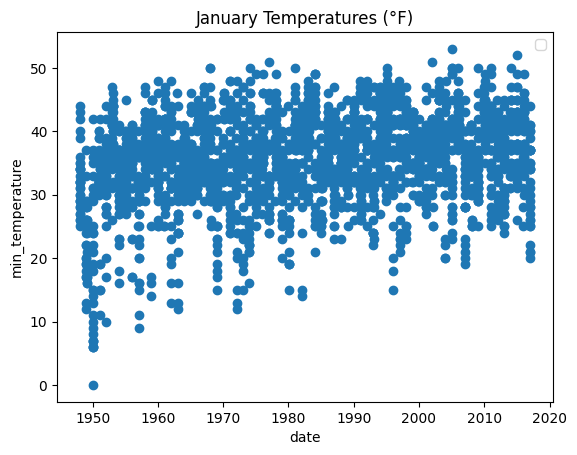

In [2]:
import matplotlib.pyplot as plt

# Let's take a quick look at our data

plt.scatter(data["date"], data["min_temperature"])

# add labels and legend
plt.xlabel("date")
plt.ylabel("min_temperature")
plt.title("January Temperatures (°F)")
plt.legend()

<ipython-input-3-25051ef6b169>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


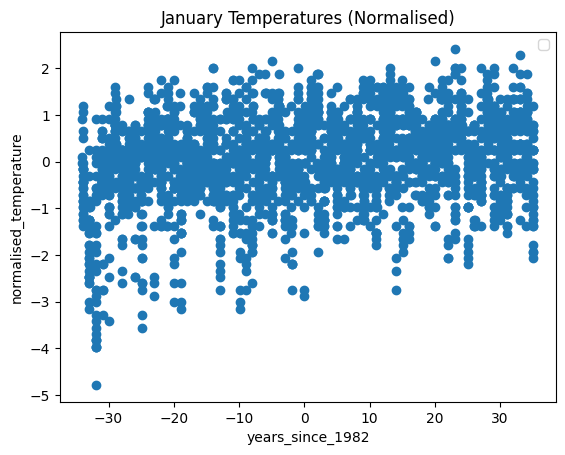

In [3]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You don't need to understand this code. We'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])

# Graph
plt.scatter(data["years_since_1982"], data["normalised_temperature"])
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperatures (Normalised)")
plt.legend()

In [4]:
class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

# Create our model ready to be trained
model = MyModel()

print("Model made!")

Model made!


Model parameters before training: 0, 0
Model visualised before training:


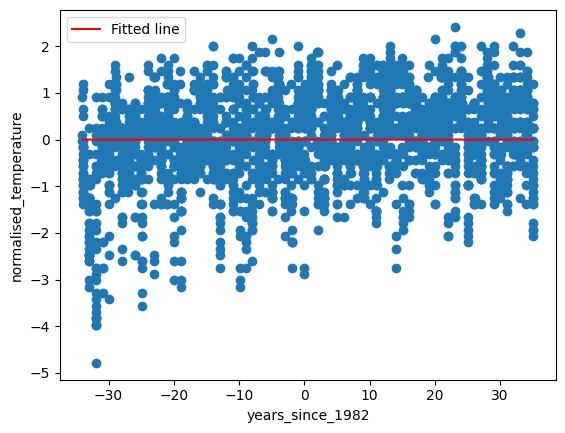

In [5]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

# Look at how well the model does before training
print("Model visualised before training:")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')


# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

In [6]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''

    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    # Convert to a single number that tells us how well the model did
    # (smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost

In [7]:
from m0b_optimizer import MyOptimizer

# Create an optimizer
optimizer = MyOptimizer()

In [8]:
def train_one_iteration(model_inputs, true_temperatures, last_cost:float):
    '''
    Runs a single iteration of training.


    model_inputs: One or more dates to provide the model (dates)
    true_temperatues: Corresponding temperatures known to occur on those dates

    Returns:
        A Boolean, as to whether training should continue
        The cost calculated (small numbers are better)
    '''

    # === USE THE MODEL ===
    # Estimate temperatures for all data that we have
    estimated_temperatures = model.predict(model_inputs)

    # === OBJECTIVE FUNCTION ===
    # Calculate how well the model is working
    # Smaller numbers are better
    difference, cost = cost_function(true_temperatures, estimated_temperatures)

    # Decide whether to keep training
    # We'll stop if the training is no longer improving the model effectively
    if cost >= last_cost:
        # Stop training
        return False, cost
    else:
        # === OPTIMIZER ===
        # Calculate updates to parameters
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        # Change the model parameters
        model.slope += slope_update
        model.intercept += intercept_update

        return True, cost

print("Training method ready")

Training method ready


In [9]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")


Model parameters before training:		0.00000000,	0.00000000
Model parameters after 1 iteration of training:	0.00000000,	0.01006832


Training beginning...
Iteration: 0
Iteration: 400
Iteration: 800
Iteration: 1200
Iteration: 1600
Iteration: 2000
Iteration: 2400
Iteration: 2800
Iteration: 3200
Iteration: 3600
Iteration: 4000
Training complete!
Model parameters after training:	-0.00648853,	0.01193327


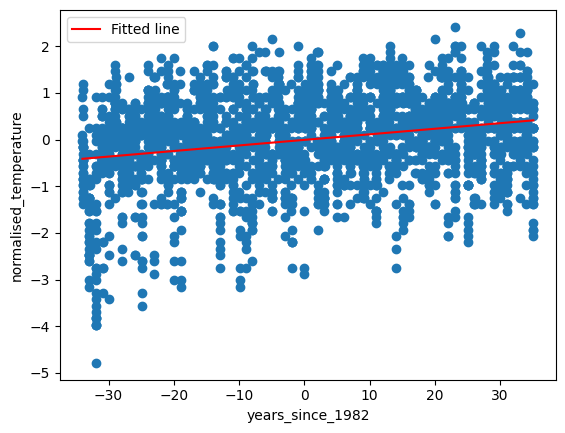

In [10]:
# Start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:

    # Run one iteration of training
    # This will tell us whether to stop training, and also what
    # the cost was for this iteration
    continue_loop, last_cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = last_cost)

    # Print the status
    if i % 400 == 0:
        print("Iteration:", i)

    i += 1


print("Training complete!")
print(f"Model parameters after training:\t{model.intercept:.8f},\t{model.slope:.8f}")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')

# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

In [11]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/microsoft_custom_linear_regressor.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
from datetime import datetime

# Load a file that contains our weather data
dataset = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Convert the dates into numbers so we can use them in our models
# We make a year column that can contain fractions. For example,
# 1948.5 is halfway through the year 1948
dataset["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in dataset.date]


# For the sake of this exercise, let's look at February 1 for the following years:
desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1),
]

dataset = dataset[dataset.date.isin(desired_dates)].copy()

# Print the dataset
dataset

--2025-04-12 22:24:47--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/microsoft_custom_linear_regressor.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2167 (2.1K) [text/plain]
Saving to: ‘microsoft_custom_linear_regressor.py’

microsoft_custom_li 100%[===================>]   2.12K  --.-KB/s    in 0s      

2025-04-12 22:24:47 (15.1 MB/s) - ‘microsoft_custom_linear_regressor.py’ saved [2167/2167]

--2025-04-12 22:24:47--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com 

,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


from matplotlib import pyplot as plt
dataset['amount_of_precipitation'].plot(kind='hist', bins=20, title='amount_of_precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset['max_temperature'].plot(kind='hist', bins=20, title='max_temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset['min_temperature'].plot(kind='hist', bins=20, title='min_temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('rain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='amount_of_precipitation', y='max_temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='max_temperature', y='min_temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='min_temperature', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['amount_of_precipitation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rain')):
  _plot_series(series, series_name, i)
  fig.legend(title='rain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('amount_of_precipitation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['max_temperature']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rain')):
  _plot_series(series, series_name, i)
  fig.legend(title='rain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('max_temperature')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['min_temperature']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rain')):
  _plot_series(series, series_name, i)
  fig.legend(title='rain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('min_temperature')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rain')):
  _plot_series(series, series_name, i)
  fig.legend(title='rain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
dataset['amount_of_precipitation'].plot(kind='line', figsize=(8, 4), title='amount_of_precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset['max_temperature'].plot(kind='line', figsize=(8, 4), title='max_temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset['min_temperature'].plot(kind='line', figsize=(8, 4), title='min_temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['rain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='amount_of_precipitation', y='rain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['rain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='max_temperature', y='rain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['rain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='min_temperature', y='rain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['rain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='year', y='rain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
import numpy

def sum_of_square_differences(estimate, actual):
    # Note that with NumPy, to square each value we use **
    return numpy.sum((estimate - actual)**2)

def sum_of_absolute_differences(estimate, actual):
    return numpy.sum(numpy.abs(estimate - actual))

In [13]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([2, 2])

print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))

SSD: 2
SAD: 2


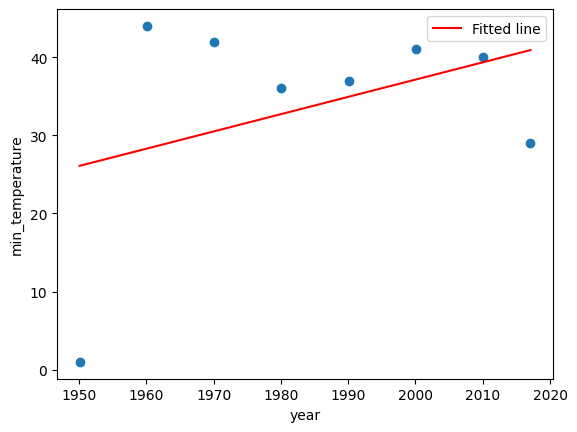

In [14]:
from microsoft_custom_linear_regressor import MicrosoftCustomLinearRegressor
import matplotlib.pyplot as plt

# Create and fit the model
# We use a custom object that we've hidden from this notebook, because
# you don't need to understand its details. This fits a linear model
# by using a provided cost function

# Fit a model by using sum of square differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year,
                                             y = dataset.min_temperature,
                                             cost_function = sum_of_square_differences)

# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')


# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()

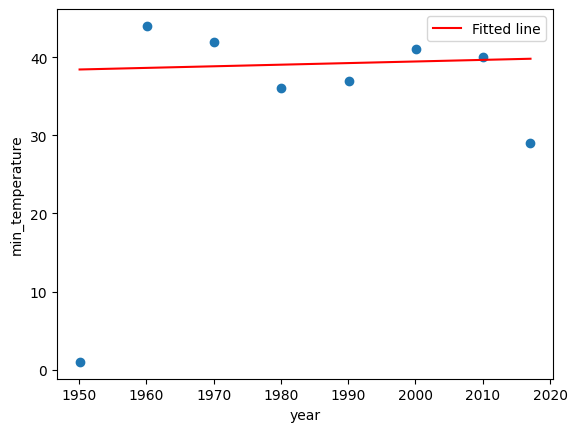

In [15]:
# Fit a model with SAD
# Fit a model by using sum of absolute differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year,
                                             y = dataset.min_temperature,
                                             cost_function = sum_of_absolute_differences)

# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')


# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()


--2025-04-15 11:00:19--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 762017 (744K) [text/plain]
Saving to: ‘seattleWeather_1948-2017.csv’

seattleWeather_1948 100%[===================>] 744.16K  --.-KB/s    in 0.04s   

2025-04-15 11:00:20 (18.2 MB/s) - ‘seattleWeather_1948-2017.csv’ saved [762017/762017]



<ipython-input-1-c85e998273c2>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


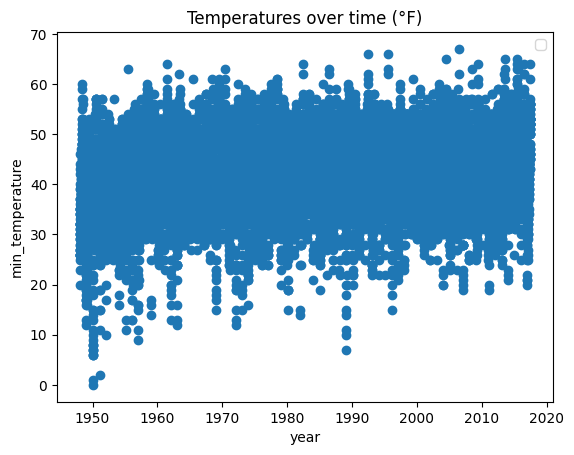

In [1]:
from datetime import datetime
import pandas
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv

# Load a file that contains weather data for Seattle
data = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Remove all dates after July 1 because we have to to plant onions before summer begins
data = data[[d.month < 7 for d in data.date]].copy()


# Convert the dates into numbers so we can use them in our models
# We make a year column that can contain fractions. For example,
# 1948.5 is halfway through the year 1948
data["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in data.date]

# Let's take a quick look at our data
plt.scatter(data["year"], data["min_temperature"])

# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.title("Temperatures over time (°F)")
plt.legend()

In [2]:
import statsmodels.formula.api as smf

# Perform linear regression to fit a line to our data
# NB OLS uses the sum or mean of squared differences as a cost function,
# which we're familiar with from our last exercise
model = smf.ols(formula = "min_temperature ~ year", data = data).fit()

# Print the model
intercept = model.params[0]
slope = model.params[1]

print(f"The model is: y = {slope:0.3f} * X + {intercept:0.3f}")

The model is: y = 0.063 * X + -83.073


<ipython-input-2-7eaf091ff749>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
<ipython-input-2-7eaf091ff749>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


In [3]:
class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

    def get_summary(self):
        '''
        Returns a string that summarises the model
        '''
        return f"y = {self.slope} * x + {self.intercept}"

print("Model class ready")

Model class ready


In [4]:
import numpy as np

x = data.year
temperature_true = data.min_temperature

# Here, we set:
#   x to a range of potential model intercepts
#   y to a range of potential model slopes
#   z as the cost for that combination of model parameters

# Choose a range of intercepts and slopes values
intercepts = np.linspace(-100,-70,10)
slopes = np.linspace(0.060,0.07,10)


# Set a cost function. This will be the mean of squared differences
def cost_function(temperature_estimate):
    """
    Calculates cost for a given temperature estimate
    Our cost function is the mean of squared differences (a.k.a. mean squared error)
    """
    # Note that with NumPy to square each value, we use **
    return np.mean((temperature_true - temperature_estimate) ** 2)

def predict_and_calc_cost(intercept, slope):
    '''
    Uses the model to make a prediction, then calculates the cost
    '''

    # Predict temperature by using these model parameters
    temperature_estimate = x * slope + intercept

    # Calculate cost
    return cost_function(temperature_estimate)

def calculate_gradient(temperature_estimate):
    """
    This calculates the gradient for a linear regession
    by using the Mean Squared Error cost function
    """

    # The partial derivatives of MSE are as follows
    # You don't need to be able to do this just yet, but
    # it's important to note that these give you the two gradients
    # that we need to train our model
    error = temperature_estimate - temperature_true
    grad_intercept = np.mean(error) * 2
    grad_slope = (x * error).mean() * 2

    return grad_intercept, grad_slope

print("Function is ready!")

Function is ready!


In [5]:
def gradient_descent(learning_rate, number_of_iterations):
    """
    Performs gradient descent for a one-variable function.

    learning_rate: Larger numbers follow the gradient more aggressively
    number_of_iterations: The maximum number of iterations to perform
    """

    # Our starting guess is y = 0 * x - 83
    # We're going to start with the correct intercept so that
    # only the line's slope is estimated. This is just to keep
    # things simple for this exercise
    model = MyModel()
    model.intercept = -83
    model.slope = 0

    for i in range(number_of_iterations):
        # Calculate the predicted values
        predicted_temperature = model.predict(x)

        # == OPTIMIZER ===
        # Calculate the gradient
        _, grad_slope = calculate_gradient(predicted_temperature)
        # Update the estimation of the line
        model.slope -= learning_rate * grad_slope

        # Print the current estimation and cost every 100 iterations
        if( i % 100 == 0):
            estimate = model.predict(x)
            cost = cost_function(estimate)
            print("Next estimate:", model.get_summary(), f"Cost: {cost}")

    # Print the final model
    print(f"Final estimate:", model.get_summary())

# Run gradient descent
gradient_descent(learning_rate=1E-9, number_of_iterations=1000)

Next estimate: y = 0.0004946403321335815 * x + -83 Cost: 15374.064817888926
Next estimate: y = 0.034564263954523125 * x + -83 Cost: 3218.050332426434
Next estimate: y = 0.050035120236006536 * x + -83 Cost: 711.4491469584532
Next estimate: y = 0.057060363506525755 * x + -83 Cost: 194.58159053167708
Next estimate: y = 0.060250493523378544 * x + -83 Cost: 88.00218235322349
Next estimate: y = 0.06169911660055105 * x + -83 Cost: 66.02523660294695
Next estimate: y = 0.06235692954504888 * x + -83 Cost: 61.4935343467107
Next estimate: y = 0.0626556393176375 * x + -83 Cost: 60.559085785362484
Next estimate: y = 0.06279128202425543 * x + -83 Cost: 60.36640010911254
Next estimate: y = 0.06285287674109104 * x + -83 Cost: 60.32666783130979
Final estimate: y = 0.06288066221361607 * x + -83


In [6]:
def gradient_descent(learning_rate, number_of_iterations):
    """
    Performs gradient descent for a one-variable function.

    learning_rate: Larger numbers follow the gradient more aggressively
    number_of_iterations: The maximum number of iterations to perform
    """

    # Our starting guess is y = 0 * x - 83
    # We're going to start with the correct intercept so that
    # only the line's slope is estimated. This is just to keep
    # things simple for this exercise
    model = MyModel()
    model.intercept = -83
    model.slope = 0

    for i in range(number_of_iterations):
        # Calculate the predicted values
        predicted_temperature = model.predict(x)

        # == OPTIMIZER ===
        # Calculate the gradient
        _, grad_slope = calculate_gradient(predicted_temperature)
        # Update the estimation of the line
        model.slope -= learning_rate * grad_slope

        # Print the current estimation and cost every 100 iterations
        if( i % 100 == 0):
            estimate = model.predict(x)
            cost = cost_function(estimate)
            print("Next estimate:", model.get_summary(), f"Cost: {cost}")

    # Print the final model
    print(f"Final estimate:", model.get_summary())

# Run gradient descent
gradient_descent(learning_rate=1E-9, number_of_iterations=1000)

Next estimate: y = 0.0004946403321335815 * x + -83 Cost: 15374.064817888926
Next estimate: y = 0.034564263954523125 * x + -83 Cost: 3218.050332426434
Next estimate: y = 0.050035120236006536 * x + -83 Cost: 711.4491469584532
Next estimate: y = 0.057060363506525755 * x + -83 Cost: 194.58159053167708
Next estimate: y = 0.060250493523378544 * x + -83 Cost: 88.00218235322349
Next estimate: y = 0.06169911660055105 * x + -83 Cost: 66.02523660294695
Next estimate: y = 0.06235692954504888 * x + -83 Cost: 61.4935343467107
Next estimate: y = 0.0626556393176375 * x + -83 Cost: 60.559085785362484
Next estimate: y = 0.06279128202425543 * x + -83 Cost: 60.36640010911254
Next estimate: y = 0.06285287674109104 * x + -83 Cost: 60.32666783130979
Final estimate: y = 0.06288066221361607 * x + -83


In [7]:
gradient_descent(learning_rate=1E-8, number_of_iterations=200)

Next estimate: y = 0.004946403321335815 * x + -83 Cost: 13267.277888290606
Next estimate: y = 0.06288803098785394 * x + -83 Cost: 60.317363492453254
Final estimate: y = 0.0629041077135948 * x + -83


In [8]:
gradient_descent(learning_rate=5E-7, number_of_iterations=500)

Next estimate: y = 0.24732016606679072 * x + -83 Cost: 133774.64171440934
Next estimate: y = 9.500952345613634e+45 * x + -83 Cost: 3.549071667291563e+98
Next estimate: y = 4.8948068107652476e+92 * x + -83 Cost: 9.420015144175701e+191
Next estimate: y = 2.52176127646564e+139 * x + -83 Cost: 2.500278766819551e+285
Next estimate: y = 1.2991891572708264e+186 * x + -83 Cost: inf
Final estimate: y = -2.2830799448010082e+232 * x + -83
